# Notebook for making graphs of the modelling results

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from typing import List


def process_netlogo_experiment_csv(
    filename: str, delete_rows: bool = True
) -> pd.DataFrame:

    if delete_rows:
        delete_redundant_rows(filename)

    df = pd.read_csv(filename, header=None, skiprows=6, nrows=12)

    df = df.transpose()

    # Set the header row as the df header
    df.columns = df.iloc[0]

    # Drop the first row
    df = df[1:]

    # Reset the index
    df = df.reset_index(drop=True)

    return df


def delete_redundant_rows(filename: str) -> None:
    """
    Delete the rows of the file that are not needed for the analysis
    """
    lines: List[str] = []
    with open(filename, "r") as f:
        lines = f.readlines()

        # Delete all lines after the 18th line
        del lines[19:]

    with open(filename, "w") as f:
        f.writelines(lines)

### Charity experiment

In this experiment we test the effect of the charity parameter on the amount of poor people in the population.

In [24]:
charity_data = process_netlogo_experiment_csv("data/charity_experiment_0_to_100.csv")

# Convert mean column to float
charity_data['[mean]'] = charity_data['[mean]'].astype(float)

charity_data['charity'] = charity_data['charity'].astype(int)

print(charity_data.shape)
charity_data.head()

(505, 12)


,[run number],lower-tax,percent-best-land,charity,upper-tax,num-people,[reporter],[final],[min],[max],[mean],[steps]
0,1,0,16,0,0,250,count-below-poverty,4,0,11,5.653069,5000
1,2,0,16,0,0,250,count-below-poverty,2,0,10,3.711858,5000
2,3,0,16,0,0,250,count-below-poverty,2,0,6,2.076385,5000
3,4,0,16,0,0,250,count-below-poverty,2,0,8,3.596281,5000
4,5,0,16,0,0,250,count-below-poverty,1,0,8,4.564887,5000


We now plot the average amount of poor people in the population for different values of the charity parameter.

Averaged over 5 runs, each run ended at 5000 ticks.

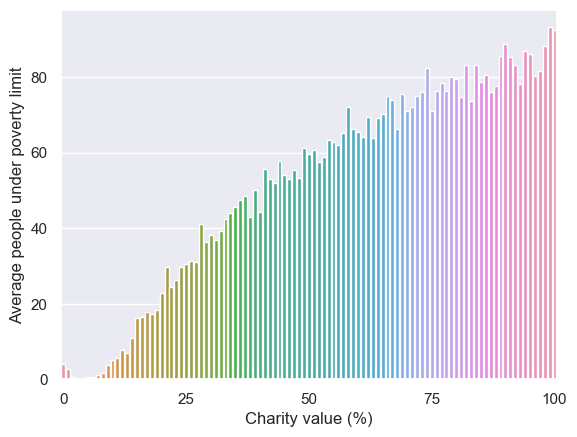

In [22]:
# Group rows by the "charity" parameter and calculate the mean of the "mean" column
grouped_data = charity_data.groupby('charity')['[mean]'].mean()

# print(grouped_data)

# Plot the grouped data
sns.set()

ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

ax.set(xlabel='Charity value (%)', ylabel='Average people under poverty limit') 
# Show less number on the x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(5))


We can clearly see that around 3 percent of the charity it looks like the optimal value.

Let's explore depper around this value.

We now plot the average amount of poor people with charity parameter from range 0.0 to 8.0 with step 0.1.
Maximum amount of ticks is 5000.

(405, 12)


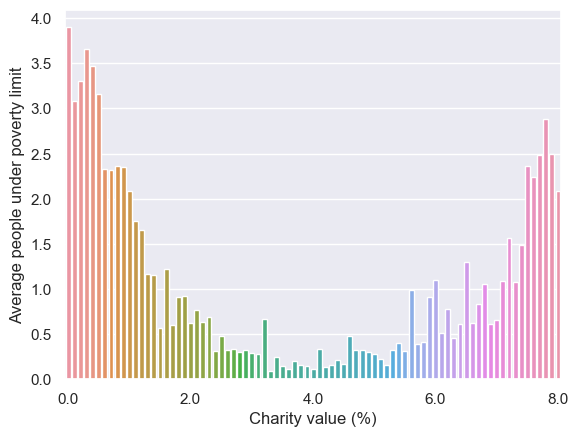

In [28]:
charity_data = process_netlogo_experiment_csv("data/charity_experiment_0_to_8.csv")

# Convert mean column to float
charity_data['[mean]'] = charity_data['[mean]'].astype(float)

charity_data['charity'] = charity_data['charity'].astype(float)

print(charity_data.shape)
charity_data.head()

# Group rows by the "charity" parameter and calculate the mean of the "mean" column
grouped_data = charity_data.groupby('charity')['[mean]'].mean()

# print(grouped_data)

# Plot the grouped data
sns.set()

ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

ax.set(xlabel='Charity value (%)', ylabel='Average people under poverty limit') 
# Show less number on the x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(5))


As we can see from the graph, the optimal value is around 4 percent.

### Taxes experiment

We now look at the effect of the lower and upper taxes parameters on the relative state treasure.

We do not look now at the amount of poor people, because that will be seen on the relative state treasure (the state is punished for the poor people for every tick).

We first define a help function to process the data for tax experiments.

In [43]:
from typing import Any


def process_tax_experiment(filename: str) -> pd.DataFrame:
    """
    Process the tax experiment data
    """
    taxes_data = process_netlogo_experiment_csv(filename)

    # Convert mean column to float
    taxes_data["[mean]"] = taxes_data["[mean]"].astype(float)

    # Convert taxes' columns to int
    taxes_data["lower-tax"] = taxes_data["lower-tax"].astype(int)
    taxes_data["upper-tax"] = taxes_data["upper-tax"].astype(int)

    return taxes_data


def plot_taxes_heatmap(taxes_data: pd.DataFrame) -> Any:
    # Group rows by the "charity" parameter and calculate the mean of the "mean" column
    grouped_data = taxes_data.groupby(["lower-tax", "upper-tax"])["[mean]"].mean()

    # Plot the grouped data
    sns.set()

    return sns.heatmap(grouped_data.unstack())

### Taxes experiment with charity value 2%

In [52]:
taxes_data = process_tax_experiment("data/experiment_taxes_charity_2.csv")

print(taxes_data.shape)
taxes_data.head()

(2205, 12)


,[run number],lower-tax,upper-tax,charity,num-people,percent-best-land,[reporter],[final],[min],[max],[mean],[steps]
0,1,0,0,2,250,16,relative-state-treasure,-0.82,-0.82,0,-0.668992,5000
1,2,0,0,2,250,16,relative-state-treasure,-0.39,-0.39,0,-0.305325,5000
2,3,0,0,2,250,16,relative-state-treasure,-0.84,-0.84,0,-0.641414,5000
3,4,0,0,2,250,16,relative-state-treasure,-2.86,-2.86,0,-1.530856,5000
4,5,0,0,2,250,16,relative-state-treasure,-3.88,-3.88,0,-2.876101,5000


We now plot a heatmap with the lower taxes parameter on the x-axis and the upper taxes parameter on the y-axis. The color represents the relative state treasure.

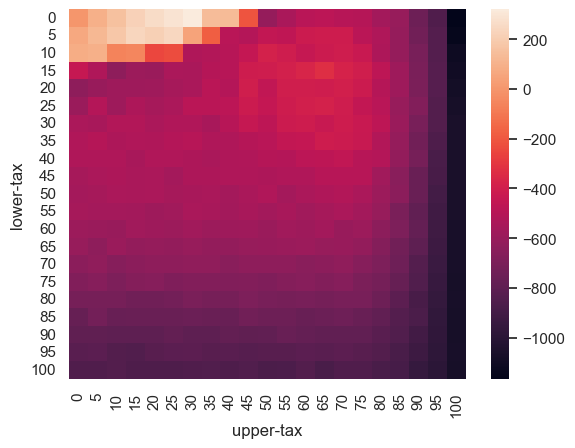

In [53]:
ax = plot_taxes_heatmap(taxes_data)

### Experiment with charity value 4%

(2205, 12)


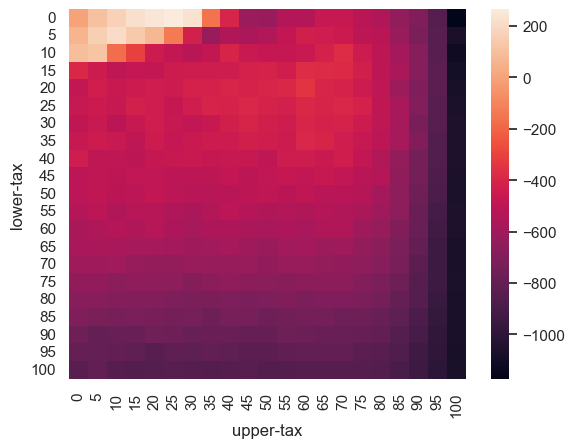

In [54]:
taxes_data = process_tax_experiment("data/experiment_taxes_charity_4.csv")

print(taxes_data.shape)
taxes_data.head()

ax = plot_taxes_heatmap(taxes_data)